In [12]:
import pickle
import pandas as pd
import numpy as np
import datetime  
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import folium
from folium.plugins import HeatMap
from math import floor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix
from sqlalchemy import create_engine
from sqlalchemy import text
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import DBSCAN, OPTICS
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import csv
from shapely.geometry import Point, Polygon
import time
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
import dask.dataframe as dd
from sklearn.neighbors import KNeighborsClassifier
import eli5
from eli5.sklearn import PermutationImportance

In [13]:
df = pd.read_csv('DOW_Taxi_Test.csv')
df

,Unnamed: 0,longitude,latitude,Hour,Day of Week,cluster_id,total_weekday_trips,total_weekend_trips,total_flags
0,21,-73.982155,40.767937,17,0,50,82.0,0.0,2
1,43,-73.982185,40.768375,17,0,50,82.0,0.0,2
2,65,-73.981796,40.768520,17,0,50,82.0,0.0,2
3,87,-73.982414,40.768234,17,0,50,82.0,0.0,2
4,109,-73.982101,40.768131,17,0,50,82.0,0.0,2
...,...,...,...,...,...,...,...,...,...
1210482,22274641,-73.997772,40.765095,19,6,398,0.0,23.0,2
1210483,22274656,-73.946228,40.821091,19,2,130,16.0,0.0,2
1210484,22274657,-74.004143,40.713058,3,4,406,2.0,0.0,2
1210485,22274659,-73.985336,40.736019,4,2,385,3.0,0.0,2


In [14]:
df = df.drop(columns=["Unnamed: 0","total_flags"])
df

,longitude,latitude,Hour,Day of Week,cluster_id,total_weekday_trips,total_weekend_trips
0,-73.982155,40.767937,17,0,50,82.0,0.0
1,-73.982185,40.768375,17,0,50,82.0,0.0
2,-73.981796,40.768520,17,0,50,82.0,0.0
3,-73.982414,40.768234,17,0,50,82.0,0.0
4,-73.982101,40.768131,17,0,50,82.0,0.0
...,...,...,...,...,...,...,...
1210482,-73.997772,40.765095,19,6,398,0.0,23.0
1210483,-73.946228,40.821091,19,2,130,16.0,0.0
1210484,-74.004143,40.713058,3,4,406,2.0,0.0
1210485,-73.985336,40.736019,4,2,385,3.0,0.0


In [15]:
columns = ['total_weekday_trips', 'total_weekday_trips']

for column in columns:
    df[column] = df[column].fillna(0)

In [16]:
df

,longitude,latitude,Hour,Day of Week,cluster_id,total_weekday_trips,total_weekend_trips
0,-73.982155,40.767937,17,0,50,82.0,0.0
1,-73.982185,40.768375,17,0,50,82.0,0.0
2,-73.981796,40.768520,17,0,50,82.0,0.0
3,-73.982414,40.768234,17,0,50,82.0,0.0
4,-73.982101,40.768131,17,0,50,82.0,0.0
...,...,...,...,...,...,...,...
1210482,-73.997772,40.765095,19,6,398,0.0,23.0
1210483,-73.946228,40.821091,19,2,130,16.0,0.0
1210484,-74.004143,40.713058,3,4,406,2.0,0.0
1210485,-73.985336,40.736019,4,2,385,3.0,0.0


In [17]:
weekend_df = df[df["Day of Week"].isin([5,6])].copy()

print(weekend_df.shape)

(342513, 7)


In [18]:
weekend_df = weekend_df.drop_duplicates(subset=["longitude","latitude","Hour","Day of Week","cluster_id","total_weekend_trips"])

In [19]:
weekend_df

,longitude,latitude,Hour,Day of Week,cluster_id,total_weekday_trips,total_weekend_trips
60,-73.980415,40.738564,0,6,225,0.0,35.0
61,-73.981323,40.737522,0,6,225,0.0,35.0
62,-73.980721,40.738167,0,6,225,0.0,35.0
63,-73.980370,40.738625,0,6,225,0.0,35.0
64,-73.981277,40.737244,0,6,225,0.0,35.0
...,...,...,...,...,...,...,...
1210472,-73.988777,40.778099,6,5,386,0.0,2.0
1210473,-73.978294,40.752399,3,6,120,0.0,22.0
1210474,-73.970558,40.799046,2,5,447,0.0,5.0
1210478,-73.965858,40.789978,4,5,197,0.0,7.0


In [20]:
weekend_df = weekend_df.drop(columns=["total_weekday_trips"])
weekend_df

,longitude,latitude,Hour,Day of Week,cluster_id,total_weekend_trips
60,-73.980415,40.738564,0,6,225,35.0
61,-73.981323,40.737522,0,6,225,35.0
62,-73.980721,40.738167,0,6,225,35.0
63,-73.980370,40.738625,0,6,225,35.0
64,-73.981277,40.737244,0,6,225,35.0
...,...,...,...,...,...,...
1210472,-73.988777,40.778099,6,5,386,2.0
1210473,-73.978294,40.752399,3,6,120,22.0
1210474,-73.970558,40.799046,2,5,447,5.0
1210478,-73.965858,40.789978,4,5,197,7.0


In [21]:
weekend_df[weekend_df["Day of Week"] == 5]

,longitude,latitude,Hour,Day of Week,cluster_id,total_weekend_trips
155,-73.973053,40.793209,13,5,7,37.0
156,-73.974113,40.791660,13,5,7,37.0
157,-73.973000,40.790482,13,5,7,37.0
158,-73.974037,40.791443,13,5,7,37.0
159,-73.972992,40.792900,13,5,7,37.0
...,...,...,...,...,...,...
1210458,-74.005623,40.738163,5,5,96,3.0
1210466,-73.952049,40.810581,6,5,354,3.0
1210472,-73.988777,40.778099,6,5,386,2.0
1210474,-73.970558,40.799046,2,5,447,5.0


***

## Model Testing

In [22]:
df['total_weekend_trips'].value_counts()

0.0      867974
34.0       7721
40.0       7598
36.0       7216
32.0       7109
          ...  
131.0       107
139.0       105
155.0        57
122.0        41
174.0        26
Name: total_weekend_trips, Length: 159, dtype: int64

In [23]:
bins = [0, 2, 4, 6, 8, np.inf]

In [24]:
labels = [0, 1, 2, 3, 4]

In [25]:
weekend_df["Taxi_Trips_Busyness"] = pd.cut(weekend_df["total_weekend_trips"], bins=bins, labels=labels, include_lowest=True)

In [26]:
weekend_df

,longitude,latitude,Hour,Day of Week,cluster_id,total_weekend_trips,Taxi_Trips_Busyness
60,-73.980415,40.738564,0,6,225,35.0,4
61,-73.981323,40.737522,0,6,225,35.0,4
62,-73.980721,40.738167,0,6,225,35.0,4
63,-73.980370,40.738625,0,6,225,35.0,4
64,-73.981277,40.737244,0,6,225,35.0,4
...,...,...,...,...,...,...,...
1210472,-73.988777,40.778099,6,5,386,2.0,0
1210473,-73.978294,40.752399,3,6,120,22.0,4
1210474,-73.970558,40.799046,2,5,447,5.0,2
1210478,-73.965858,40.789978,4,5,197,7.0,3


In [27]:
busyness_counts = weekend_df['Taxi_Trips_Busyness'].value_counts().sort_index()

print(busyness_counts)

0       151
1      1215
2      2360
3      3304
4    335483
Name: Taxi_Trips_Busyness, dtype: int64


In [28]:
X = weekend_df[["longitude","latitude","Hour","Day of Week"]]
y = weekend_df["Taxi_Trips_Busyness"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [31]:
model.fit(X_train, y_train.astype('int'))

RandomForestClassifier(random_state=42)

In [32]:
y_pred = model.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [34]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# R-squared Score
r2 = r2_score(y_test, y_pred)
print('R-squared Score:', r2)

Mean Absolute Error: 0.0187243318994881
Mean Squared Error: 0.03785740701091928
Root Mean Squared Error: 0.1945697998429337
R-squared Score: 0.49648579795912595


In [35]:
start_time = time.time()

rf_model = RandomForestClassifier(random_state=42)
rf_model = rf_model.fit(X_train, y_train)
end_time = time.time()
rf_time = end_time - start_time
print(f"Time taken to train Random Forest model : {rf_time} seconds")

Time taken to train Random Forest model : 22.009230136871338 seconds


In [36]:
predicted_values = rf_model.predict(X_test)

In [37]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_values})
print(predictions)

        Actual  Predicted
1104852      4          4
1133662      4          4
136427       4          4
1122014      4          4
973643       4          4
...        ...        ...
246035       4          4
412470       4          4
1021808      4          4
93228        4          4
998047       4          4

[102754 rows x 2 columns]


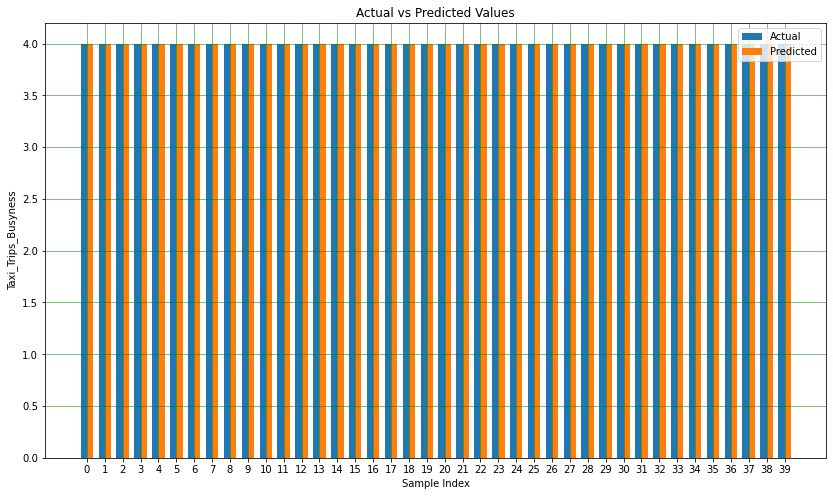

In [38]:
# Sample and reset index
predictions_sample = predictions.sample(40).reset_index(drop=True)

# Create an appropriate range for the x-axis
x = np.arange(len(predictions_sample))

# Define bar width
bar_width = 0.35

# Create subplots
fig, ax = plt.subplots(figsize=(14,8))

# Generate bars for actual and predicted values
rects1 = ax.bar(x - bar_width/2, predictions_sample['Actual'], bar_width, label='Actual')
rects2 = ax.bar(x + bar_width/2, predictions_sample['Predicted'], bar_width, label='Predicted')

# Add some text for labels, title and custom x-axis tick labels
ax.set_xlabel('Sample Index')
ax.set_ylabel('Taxi_Trips_Busyness')
ax.set_title('Actual vs Predicted Values')
ax.set_xticks(x)
ax.legend()

plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Good representation for how actual vs predicted values but poor representation for range in binning values

In [39]:
print("Random Forest Classifier Report: \n", classification_report(y_test, predicted_values))

Random Forest Classifier Report: 
               precision    recall  f1-score   support

           0       0.17      0.02      0.04        48
           1       0.70      0.43      0.53       373
           2       0.75      0.48      0.59       698
           3       0.78      0.54      0.64       938
           4       0.99      1.00      1.00    100697

    accuracy                           0.99    102754
   macro avg       0.68      0.49      0.56    102754
weighted avg       0.99      0.99      0.99    102754



In [40]:
importances = model.feature_importances_

In [41]:
feature_importances = pd.DataFrame({"feature": X.columns, "importance": importances})
feature_importances = feature_importances.sort_values("importance", ascending=False)

In [42]:
print(feature_importances)

       feature  importance
1     latitude    0.374519
0    longitude    0.361211
2         Hour    0.235842
3  Day of Week    0.028429


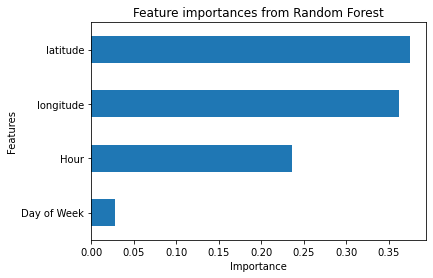

In [43]:
feature_importances.set_index('feature', inplace=True)
feature_importances.sort_values(by="importance", ascending=True, inplace=True)

feature_importances.plot(kind='barh', legend=False)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature importances from Random Forest')
plt.show()

### Displays the difference between the taxi trips between Saturday and Sunday values

***

## Testing Other Models

## Decision Tree Classifier

In [44]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Classifier Report: \n", classification_report(y_test, dt_predictions))

Decision Tree Classifier Report: 
               precision    recall  f1-score   support

           0       0.06      0.06      0.06        48
           1       0.45      0.40      0.42       373
           2       0.54      0.46      0.50       698
           3       0.55      0.56      0.56       938
           4       0.99      0.99      0.99    100697

    accuracy                           0.98    102754
   macro avg       0.52      0.50      0.51    102754
weighted avg       0.98      0.98      0.98    102754



## K-Nearest Neighbors Classifier

In [45]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("K-Nearest Neighbors Classifier Report: \n", classification_report(y_test, knn_predictions))

K-Nearest Neighbors Classifier Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.51      0.28      0.36       373
           2       0.58      0.38      0.46       698
           3       0.69      0.53      0.60       938
           4       0.99      1.00      0.99    100697

    accuracy                           0.99    102754
   macro avg       0.56      0.44      0.48    102754
weighted avg       0.98      0.99      0.98    102754



## Incorporate more binning values and change to regressional approach

In [46]:
# Create binning values for 50 noise complaint categories to ensure equal distributions 
weekend_df["Taxi_Trips_Busyness"] = pd.qcut(weekend_df["total_weekend_trips"], q=53, labels=False, duplicates='drop')

In [47]:
test = weekend_df["Taxi_Trips_Busyness"]

In [48]:
test.value_counts()

33    10505
9     10189
35     9557
6      9274
2      7916
44     7735
18     7721
42     7608
24     7598
4      7351
20     7216
38     7169
16     7109
46     7048
0      7030
39     6920
26     6898
12     6887
19     6868
21     6838
15     6820
23     6817
17     6718
13     6696
14     6681
28     6584
3      6579
48     6571
50     6511
25     6505
11     6487
51     6407
22     6396
1      6338
29     6218
49     6153
27     6059
41     6014
30     5986
40     5821
31     5679
10     5670
47     5664
43     5392
45     5323
8      4985
32     4924
36     4730
7      4526
5      4292
34     4022
37     3508
Name: Taxi_Trips_Busyness, dtype: int64

In [49]:
weekend_df

,longitude,latitude,Hour,Day of Week,cluster_id,total_weekend_trips,Taxi_Trips_Busyness
60,-73.980415,40.738564,0,6,225,35.0,19
61,-73.981323,40.737522,0,6,225,35.0,19
62,-73.980721,40.738167,0,6,225,35.0,19
63,-73.980370,40.738625,0,6,225,35.0,19
64,-73.981277,40.737244,0,6,225,35.0,19
...,...,...,...,...,...,...,...
1210472,-73.988777,40.778099,6,5,386,2.0,0
1210473,-73.978294,40.752399,3,6,120,22.0,7
1210474,-73.970558,40.799046,2,5,447,5.0,0
1210478,-73.965858,40.789978,4,5,197,7.0,0


In [50]:
test = weekend_df[weekend_df["Taxi_Trips_Busyness"] == 24]

In [51]:
test

,longitude,latitude,Hour,Day of Week,cluster_id,total_weekend_trips,Taxi_Trips_Busyness
2644,-73.973167,40.755699,15,5,497,40.0,24
2645,-73.972160,40.755924,15,5,497,40.0,24
2646,-73.972160,40.755054,15,5,497,40.0,24
2647,-73.972664,40.756283,15,5,497,40.0,24
2648,-73.972816,40.755348,15,5,497,40.0,24
...,...,...,...,...,...,...,...
1192095,-73.998001,40.735764,1,6,77,40.0,24
1192096,-73.997124,40.735741,1,6,77,40.0,24
1192097,-73.998314,40.735416,1,6,77,40.0,24
1192098,-73.998253,40.735550,1,6,77,40.0,24


In [52]:
test["Hour"].value_counts()

13    680
19    585
11    551
18    507
15    504
12    478
17    453
10    450
14    439
0     406
20    401
21    375
23    359
22    348
16    303
9     253
1     199
2     180
3      77
8      38
6       7
4       5
Name: Hour, dtype: int64

In [53]:
weekend_df["Taxi_Trips_Busyness"].nunique()

52

## Create the Model for Regression Capabilities

In [54]:
weekend_df["Taxi_Trips_Busyness_Category"] = weekend_df["Taxi_Trips_Busyness"] / 25

In [55]:
weekend_df

,longitude,latitude,Hour,Day of Week,cluster_id,total_weekend_trips,Taxi_Trips_Busyness,Taxi_Trips_Busyness_Category
60,-73.980415,40.738564,0,6,225,35.0,19,0.76
61,-73.981323,40.737522,0,6,225,35.0,19,0.76
62,-73.980721,40.738167,0,6,225,35.0,19,0.76
63,-73.980370,40.738625,0,6,225,35.0,19,0.76
64,-73.981277,40.737244,0,6,225,35.0,19,0.76
...,...,...,...,...,...,...,...,...
1210472,-73.988777,40.778099,6,5,386,2.0,0,0.00
1210473,-73.978294,40.752399,3,6,120,22.0,7,0.28
1210474,-73.970558,40.799046,2,5,447,5.0,0,0.00
1210478,-73.965858,40.789978,4,5,197,7.0,0,0.00


In [56]:
weekend_df["Taxi_Trips_Busyness_Category"]

60         0.76
61         0.76
62         0.76
63         0.76
64         0.76
           ... 
1210472    0.00
1210473    0.28
1210474    0.00
1210478    0.00
1210482    0.32
Name: Taxi_Trips_Busyness_Category, Length: 342513, dtype: float64

***

## Model Building and Testing

In [57]:
X = weekend_df[["longitude","latitude","Hour","Day of Week"]]
y = weekend_df["Taxi_Trips_Busyness_Category"]

#### May be beneficial to test the accuracy of other models to train the most optimal solution for our application

In [58]:
models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

In [59]:
metrics = {
    "Model": [],
    "RMSE": [],
    "R-squared": [],
    "MAE": [],
    "Training time": []
}

for model_name, model in models.items():
    start = time.time()
    
    model.fit(X_train, y_train)
    
    end = time.time()
    
    model_time = end - start
    
    y_pred = model.predict(X_test)
    
    model_rmse = sqrt(mean_squared_error(y_test, y_pred))
    model_r2 = r2_score(y_test, y_pred)
    model_mae = mean_absolute_error(y_test, y_pred)
    
    metrics["Model"].append(model_name)
    metrics["RMSE"].append(model_rmse)
    metrics["R-squared"].append(model_r2)
    metrics["MAE"].append(model_mae)
    metrics["Training time"].append(model_time)
    
    print(f"{model_name}:\n- RMSE: {model_rmse}\n- R-squared: {model_r2}\n- MAE: {model_mae}\n- Training time: {model_time}\n")

Ridge:
- RMSE: 0.2716670490052955
- R-squared: 0.018399454848434083
- MAE: 0.07419572528685742
- Training time: 0.025300025939941406

Lasso:
- RMSE: 0.2742018180837691
- R-squared: -3.5011018282293804e-06
- MAE: 0.07001841741211727
- Training time: 0.012594223022460938

Decision Tree:
- RMSE: 0.2222819577449548
- R-squared: 0.3428427753826433
- MAE: 0.025293419234287715
- Training time: 0.6488797664642334

Random Forest:
- RMSE: 0.17306054241245697
- R-squared: 0.6016571910004105
- MAE: 0.027049360608832746
- Training time: 39.97927713394165

Gradient Boosting:
- RMSE: 0.22367663300348364
- R-squared: 0.3345704331832985
- MAE: 0.04889012416994981
- Training time: 13.627759218215942



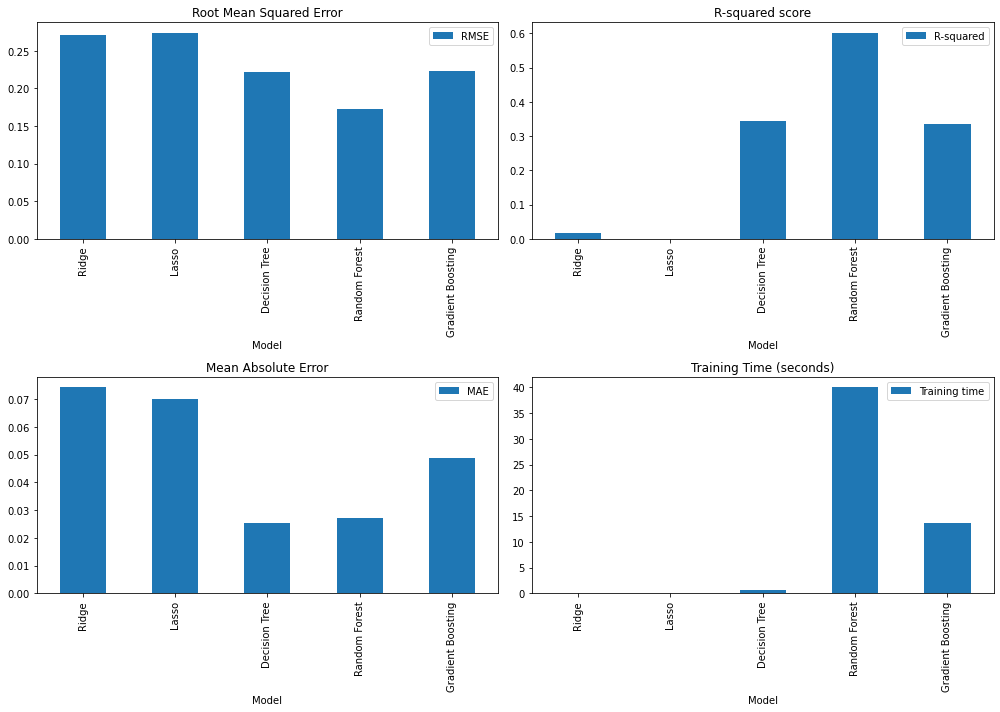

In [60]:
metrics_df = pd.DataFrame(metrics)

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

metrics_df.plot(x="Model", y="RMSE", kind="bar", ax=ax[0, 0])
ax[0, 0].set_title("Root Mean Squared Error")

metrics_df.plot(x="Model", y="R-squared", kind="bar", ax=ax[0, 1])
ax[0, 1].set_title("R-squared score")

metrics_df.plot(x="Model", y="MAE", kind="bar", ax=ax[1, 0])
ax[1, 0].set_title("Mean Absolute Error")

metrics_df.plot(x="Model", y="Training time", kind="bar", ax=ax[1, 1])
ax[1, 1].set_title("Training Time (seconds)")

plt.tight_layout()
plt.show()

#### Evident to see from the above metrics suggest that the Random Forest Regressor, as well as the Classifier model previously, is the most accurate model for our approach to modelling

* Below is the approach and further analysis of the model to ensure we have made the correct choice

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
rf_model = RandomForestRegressor(n_estimators = 5, random_state = 42)

In [63]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=42)

In [64]:
y_pred = rf_model.predict(X_test)

In [65]:
predictions = rf_model.predict(X_test)

In [66]:
df1 = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
print(df1)

       Actual  Predicted
0        0.12      0.120
1        1.64      1.640
2        0.68      0.824
3        0.48      0.960
4        1.24      1.240
...       ...        ...
68498    1.96      2.008
68499    1.04      1.040
68500    0.16      0.160
68501    0.60      0.600
68502    0.08      0.064

[68503 rows x 2 columns]


In [67]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [68]:
print("Random Forest - Root Mean Squared Error (RMSE):", rmse)
print("Random Forest - R-squared score:", r2)
print("Random Forest - Mean absolute error:", mae)

Random Forest - Root Mean Squared Error (RMSE): 0.15313077912912448
Random Forest - R-squared score: 0.9344260527312596
Random Forest - Mean absolute error: 0.06291333226282067


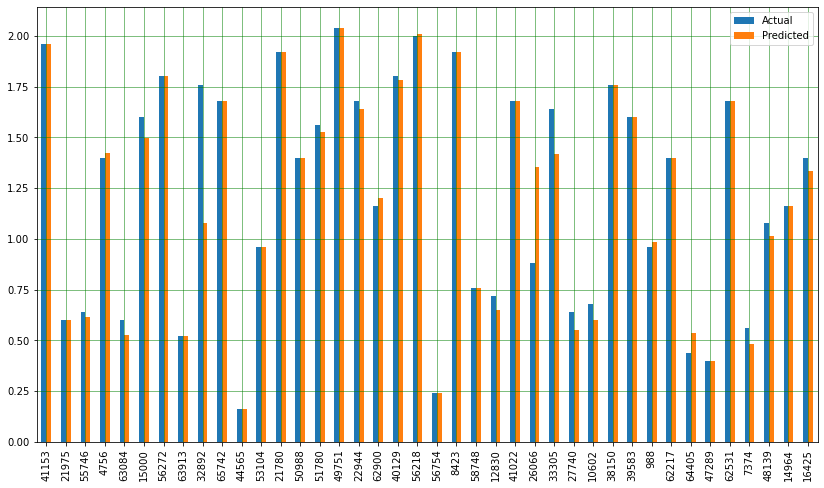

In [69]:
df1.sample(40).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

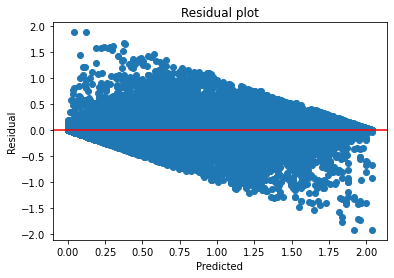

In [70]:
y_pred = rf_model.predict(X_test)

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual plot')
plt.show()

In [71]:
importances = list(rf_model.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

In [72]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: latitude             Importance: 0.36
Variable: longitude            Importance: 0.34
Variable: Hour                 Importance: 0.26
Variable: Day of Week          Importance: 0.04


In [73]:
perm = PermutationImportance(rf_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.4449 ± 0.0033,latitude
1.3844 ± 0.0071,longitude
1.1009 ± 0.0049,Hour
0.2387 ± 0.0017,Day of Week


### Day of the Week is slightly less significant in comparison to the classification model - Latitude, Longitude and Hour are appearing to be more important in terms of the relevance to impacting a final prediction 

## Create pkl file with RF model 

In [74]:
pkl_filename = "rf_weekend_model_noweather.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_model, file)

## Create a CSV file for backend rendering

In [75]:
weekend_df

,longitude,latitude,Hour,Day of Week,cluster_id,total_weekend_trips,Taxi_Trips_Busyness,Taxi_Trips_Busyness_Category
60,-73.980415,40.738564,0,6,225,35.0,19,0.76
61,-73.981323,40.737522,0,6,225,35.0,19,0.76
62,-73.980721,40.738167,0,6,225,35.0,19,0.76
63,-73.980370,40.738625,0,6,225,35.0,19,0.76
64,-73.981277,40.737244,0,6,225,35.0,19,0.76
...,...,...,...,...,...,...,...,...
1210472,-73.988777,40.778099,6,5,386,2.0,0,0.00
1210473,-73.978294,40.752399,3,6,120,22.0,7,0.28
1210474,-73.970558,40.799046,2,5,447,5.0,0,0.00
1210478,-73.965858,40.789978,4,5,197,7.0,0,0.00


In [77]:
weekend_df[weekend_df["Taxi_Trips_Busyness_Category"] > 0.6]

,longitude,latitude,Hour,Day of Week,cluster_id,total_weekend_trips,Taxi_Trips_Busyness,Taxi_Trips_Busyness_Category
60,-73.980415,40.738564,0,6,225,35.0,19,0.76
61,-73.981323,40.737522,0,6,225,35.0,19,0.76
62,-73.980721,40.738167,0,6,225,35.0,19,0.76
63,-73.980370,40.738625,0,6,225,35.0,19,0.76
64,-73.981277,40.737244,0,6,225,35.0,19,0.76
...,...,...,...,...,...,...,...,...
1209896,-73.919724,40.796497,1,6,253,32.0,16,0.64
1209908,-73.939774,40.830257,12,5,283,32.0,16,0.64
1210088,-73.958237,40.769135,2,6,17,35.0,19,0.76
1210125,-73.945763,40.777813,2,5,185,34.0,18,0.72


In [78]:
weekend_df.to_csv("New_Weekend_Model_Data_NoWeather.csv")